In [2]:
import sqlalchemy
import pandas as pd
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine

In [3]:
engine = sqlalchemy.create_engine('sqlite:///../db/azure_packing_trace.db')
connection = engine.connect()

In [4]:
df1 = pd.read_sql_query('select * from vmType', connection)
df2 = pd.read_sql_query('select * from vm', connection)
print(df1.info(), df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4619 entries, 0 to 4618
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         4619 non-null   int64  
 1   vmTypeId   4619 non-null   int64  
 2   machineId  4619 non-null   int64  
 3   core       4619 non-null   float64
 4   memory     4619 non-null   float64
 5   hdd        959 non-null    float64
 6   ssd        4619 non-null   float64
 7   nic        4619 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 288.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4664759 entries, 0 to 4664758
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   vmId       int64  
 1   tenantId   int64  
 2   vmTypeId   int64  
 3   priority   int64  
 4   starttime  float64
 5   endtime    float64
dtypes: float64(2), int64(4)
memory usage: 213.5 MB
None None


4664759 
5559800 

In [53]:
df1[['core', 'memory']].value_counts()

core      memory  
1.000000  0.875000    45
0.083333  0.072917    44
0.041667  0.018229    40
0.083333  0.036458    40
0.166667  0.072917    39
                      ..
0.004167  0.002667     1
          0.003556     1
0.005000  0.002000     1
0.006250  0.003111     1
          0.004557     1
Name: count, Length: 973, dtype: int64

In [ ]:
cpu_count = df1['core'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=cpu_count.index, y=cpu_count.values)
plt.yscale('log')
plt.ylabel('Number of VM types')
plt.title('Machine CPU unit distribution')

In [ ]:
memory_count = df1['memory'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=memory_count.index, y=memory_count.values)
plt.yscale('log')
plt.ylabel('Number of VM types')
plt.title('Machine Memory unit distribution')

In [ ]:
ssd_count = df1['ssd'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=ssd_count.index, y=ssd_count.values)
plt.yscale('log')
plt.ylabel('Number of VM types')
plt.title('Machine SSD unit distribution')

Make new column runtime which is derived from endtime - starttime

In [5]:
df2['runtime'] = df2['endtime'] - df2['starttime']

In [31]:
print(df2)

            vmId  tenantId  vmTypeId  priority  starttime    endtime   runtime
0              5         0         8         0   0.479317   0.872822  0.393505
1             10         0         8         0   0.520289   0.694538  0.174249
2             13         0         8         0   0.587153   0.613120  0.025967
3             14         1         6         0   0.589155   0.590439  0.001284
4             15         2         6         0   0.589352   0.590706  0.001354
...          ...       ...       ...       ...        ...        ...       ...
4664754  7735508   2791895        42         0  13.381644  13.382375  0.000732
4664755  7735509   2791895        42         0  13.381644  13.382375  0.000732
4664756  7735516   2791704        42         0  13.397303  13.404040  0.006736
4664757  7735517   2791704        42         0  13.397303  13.404040  0.006736
4664758  7735518   2791704        42         0  13.397303  13.404040  0.006736

[4664759 rows x 7 columns]


In [6]:
print(df2['runtime'].describe())

count    4.664759e+06
mean     4.688676e-01
std      3.313608e+00
min      3.590249e-07
25%      7.416401e-03
50%      2.307667e-02
75%      9.257595e-02
max      8.963879e+01
Name: runtime, dtype: float64


In [7]:
df2['runtime'].value_counts()

runtime
0.010064    32
0.010064    31
0.010077    31
0.010034    30
0.010077    30
            ..
5.978453     1
5.978453     1
5.978453     1
5.978453     1
5.978453     1
Name: count, Length: 2755915, dtype: int64

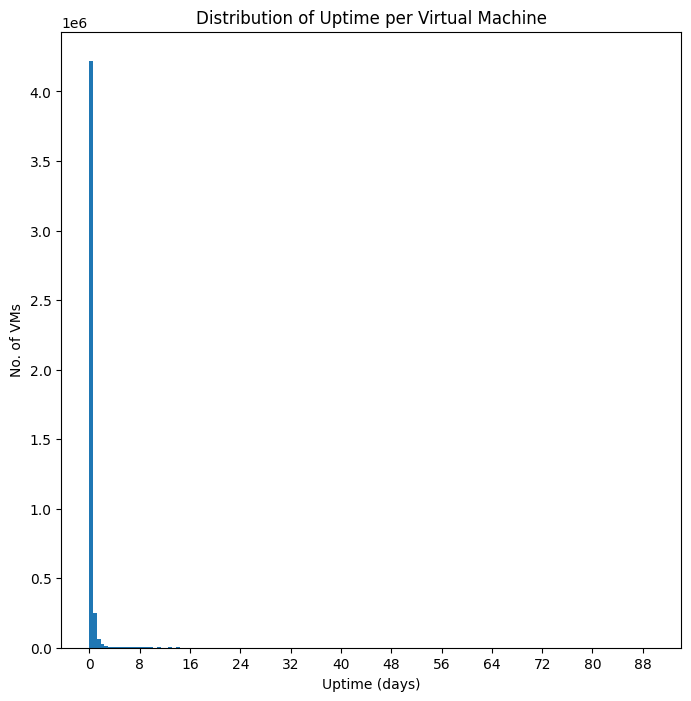

In [96]:
uptime = df2['runtime']
plt.figure(figsize=(8, 8))
plt.title("Distribution of Uptime per Virtual Machine")
plt.ylabel("No. of VMs")
plt.xlabel("Uptime (days)")

xticks = np.arange(0, 99, 8)
xlabels = [x for x in xticks]
plt.xticks(ticks=xticks, labels=xlabels)
plt.hist(uptime, bins=150)
plt.show()

In [ ]:
connection.close()